**CONTEXT:**  A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee  majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the  borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an  average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing  department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit  with same budget as per last campaign. 

**PROJECT OBJECTIVE:** Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

#  Data Understanding and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv("Data2.csv")

In [3]:
print(df1.info())
print('*'*74)
print(df2.info())
print('*'*74)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
None
**************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   M

In [4]:
df  = pd.merge(df1,df2,on = "ID")

In [5]:
# df['LoanOnCard'] = df["LoanOnCard"].map({0:"No",1:"Yes"})

In [6]:
colnames = ['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']

In [7]:
for feature in colnames:
    df[feature] = df[feature].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


#  Data Exploration and Analysis

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

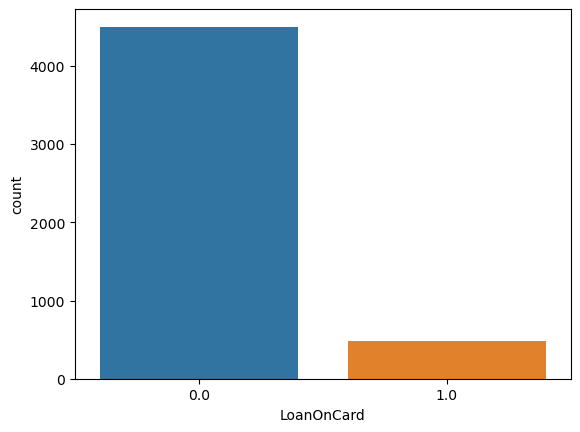

In [9]:
sns.countplot(data = df,x = df["LoanOnCard"])

In [10]:
df.isna().sum()/len(df)

ID                     0.000
Age                    0.000
CustomerSince          0.000
HighestSpend           0.000
ZipCode                0.000
HiddenScore            0.000
MonthlyAverageSpend    0.000
Level                  0.000
Mortgage               0.000
Security               0.000
FixedDepositAccount    0.000
InternetBanking        0.000
CreditCard             0.000
LoanOnCard             0.004
dtype: float64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isna().sum()/len(df)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

In [13]:
col_list = df.select_dtypes(include='object').columns

In [14]:
col_list

Index(['HiddenScore', 'Level', 'Security', 'FixedDepositAccount',
       'InternetBanking', 'CreditCard'],
      dtype='object')

In [15]:
for i in col_list:
    print("Unique Values in {} are \n".format(i),df[i].value_counts())
    print("**"*20)

Unique Values in HiddenScore are 
 1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64
****************************************
Unique Values in Level are 
 1    2089
3    1496
2    1395
Name: Level, dtype: int64
****************************************
Unique Values in Security are 
 0    4460
1     520
Name: Security, dtype: int64
****************************************
Unique Values in FixedDepositAccount are 
 0    4678
1     302
Name: FixedDepositAccount, dtype: int64
****************************************
Unique Values in InternetBanking are 
 1    2974
0    2006
Name: InternetBanking, dtype: int64
****************************************
Unique Values in CreditCard are 
 0    3514
1    1466
Name: CreditCard, dtype: int64
****************************************


#  Data Preparation and model building

In [16]:
X = df.drop(['LoanOnCard','ID','ZipCode'],axis=1)
y = df['LoanOnCard']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state= 90)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression(solver='lbfgs',max_iter=2000)

In [21]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [22]:
log_model.score(X_train,y_train)

0.9507362784471218

In [23]:
log_model.score(X_test,y_test)

0.9582329317269076

In [24]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,plot_confusion_matrix,classification_report

In [25]:
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

In [26]:
print("Training_score :",accuracy_score(y_train,y_train_pred))
print("**"*25)
print("Testing_score :",accuracy_score(y_test,y_test_pred))
print("**"*25)
print("Training_metrics :",classification_report(y_train,y_train_pred))
print("**"*25)
print("Testing_metrics :",classification_report(y_test,y_test_pred))
print("**"*25)

Training_score : 0.9507362784471218
**************************************************
Testing_score : 0.9582329317269076
**************************************************
Training_metrics :               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3375
         1.0       0.83      0.62      0.71       360

    accuracy                           0.95      3735
   macro avg       0.89      0.80      0.84      3735
weighted avg       0.95      0.95      0.95      3735

**************************************************
Testing_metrics :               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1125
         1.0       0.90      0.63      0.75       120

    accuracy                           0.96      1245
   macro avg       0.93      0.81      0.86      1245
weighted avg       0.96      0.96      0.95      1245

**************************************************


# Balacing The Dataset 

In [27]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [29]:
under_sample = RandomUnderSampler(sampling_strategy=0.5)
over_sample = RandomOverSampler(sampling_strategy='minority')

In [30]:
X_under,y_under = under_sample.fit_resample(X,y)

In [31]:
X_under.shape

(1440, 11)

In [32]:
y_under.shape

(1440,)

In [33]:
y_under.value_counts()

0.0    960
1.0    480
Name: LoanOnCard, dtype: int64

In [34]:
X_new,y_new = over_sample.fit_resample(X_under,y_under)

In [35]:
X_new.shape

(1920, 11)

In [36]:
y_new.value_counts()

0.0    960
1.0    960
Name: LoanOnCard, dtype: int64

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size = 0.25,random_state = 42)

In [38]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [39]:
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

In [40]:
print("Training_score :",accuracy_score(y_train,y_train_pred))
print("**"*25)
print("Testing_score :",accuracy_score(y_test,y_test_pred))
print("**"*25)
print("Training_metrics :",classification_report(y_train,y_train_pred))
print("**"*25)
print("Testing_metrics :",classification_report(y_test,y_test_pred))
print("**"*25)

Training_score : 0.8993055555555556
**************************************************
Testing_score : 0.9208333333333333
**************************************************
Training_metrics :               precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       719
         1.0       0.89      0.91      0.90       721

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440

**************************************************
Testing_metrics :               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       241
         1.0       0.92      0.92      0.92       239

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480

**************************************************


#  Performance Improvement

In [41]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [42]:
def classify(classifier):
    classifier.fit(X_train,y_train)
    pred_train = classifier.predict(X_train)
    pred_test = classifier.predict(X_test)
    print('Training Performace')
    print(classification_report(y_train,y_train_pred))
    print('*'*50)
    print('Testing Performace')
    print(classification_report(y_test,y_test_pred))

In [43]:
svm = SVC()
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       719
         1.0       0.89      0.91      0.90       721

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       241
         1.0       0.92      0.92      0.92       239

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



In [44]:
nb = GaussianNB()
classify(nb)

Training Performace
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       719
         1.0       0.89      0.91      0.90       721

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       241
         1.0       0.92      0.92      0.92       239

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



In [45]:
svm = SVC(C=5,kernel='rbf',gamma='auto')
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       719
         1.0       0.89      0.91      0.90       721

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       241
         1.0       0.92      0.92      0.92       239

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480

